<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Run-Wrapped-Optimizer" data-toc-modified-id="Run-Wrapped-Optimizer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Run Wrapped Optimizer</a></span></li><li><span><a href="#Experiment-with-Wrapper" data-toc-modified-id="Experiment-with-Wrapper-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment with Wrapper</a></span></li></ul></div>

In [1]:
from fastai2.vision.all import *

In [4]:
def wrap_my_opt(opt):
    def f(params, lr, **kwargs):
        return opt(params,lr,**kwargs)
    return f

In [5]:
wrapped_opt = wrap_my_opt(Adam)

## Run Wrapped Optimizer

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)

In [7]:
Path.BASE_PATH = path

In [8]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [9]:
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(),
    item_tfms=Resize(28),
    batch_tfms=[]
)

In [10]:
datablock.summary(path)

Setting-up type transforms pipelines
Found 14434 items
2 datasets of sizes 12396,2038
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /Users/butch/.fastai/data/mnist_sample/train/7/30224.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /Users/butch/.fastai/data/mnist_sample/train/7/30224.png
    applying parent_label gives
      7
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(1))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=28x28, TensorCategory(1))
    applying Resize gives
      (PILImageBW mod

In [11]:
dls = datablock.dataloaders(path, bs=64)

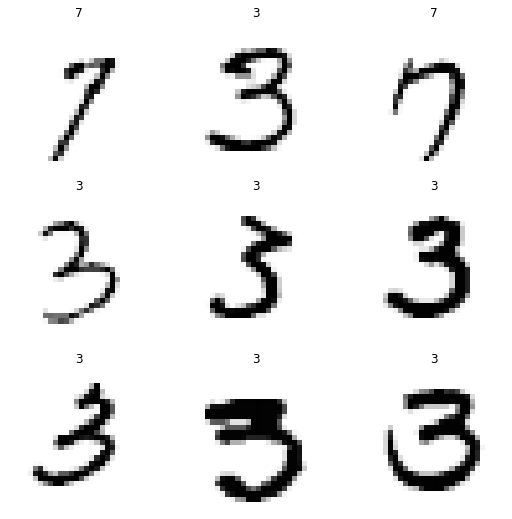

In [12]:
dls.show_batch()

In [13]:
learner = cnn_learner(dls, resnet18, metrics=accuracy)

In [14]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.284227,0.176382,0.934249,03:45


KeyboardInterrupt: 

## Experiment with Wrapper

In [45]:

    
class WrapperOpt:
    def __init__(self, f):
        self.f = f
    
    def __call__(self, *args, **kwargs):
        opt = self.f(*args, **kwargs)
        def mystep():
            print('this is now my step')
            print('mystep self ', type(opt))
        print('opt type', type(opt))       
        print('has opt step: ', hasattr(opt,'step') )
        opt.step = mystep
        return opt
    
def wrap_opt_with_class(f):
    w = WrapperOpt(f)
    return w

In [16]:
optim1 = Adam([1,2,3], lr=0.1)

In [17]:
?optim1

In [18]:
optim2 = wrapped_opt([1,2,3],lr=0.2)

In [20]:
?optim2

In [46]:
wrapped_opt2 = wrap_opt_with_class(Adam)

In [47]:
optim3 = wrapped_opt2([1,2,3],lr=0.3)

opt type <class 'fastai2.optimizer.Optimizer'>
has opt step:  True


In [48]:
optim3?

In [49]:
optim3.step()

this is now my step
mystep self  <class 'fastai2.optimizer.Optimizer'>
